_Pablo Latorre and Hafid Laayouni_

You need to install the following Python packages: _pandas, matplotlib, statsmodels, scipy and numpy._

You can do it in Linux, for instance, with [pip installer](https://pypi.python.org/pypi/pip) by typing the following command in the terminal:

__sudo pip install pandas matplotlib statsmodels scipy numpy__

Then, you have to import in Python the following packages:

In [3]:
# loading required functions and modules #
import pandas as pd # Read data and work with data frames
import matplotlib.pyplot as plt # Boxplot and histogram
import statsmodels.api as sm # QQ plot
import scipy.stats as stats # Basic statistics
import numpy as np # Scientific computing

Besides, at the end of this document there is a **Functions' guide** section with practical information about some of the functions used in this session.

# Functions in Python
Defining functions in Python is very easy. We just have to define the name of the function and arguments using Python's specific notation. Here's an example of a function that sums two numbers.

In [2]:
def doSum(number1, number2):
    # do the operation and save it to a variable
    result = number1 + number2
    # output to return
    return(result)

doSum(2,3)

5

In [3]:
# we can save the output of the function into a variable
result1_6 = doSum(1,6)
result1_6

7

Of course, Python has the built-in function *sum()* to do this:

In [4]:
sum([2,3])

5

# Inference and Parameter estimation
Here we have data on the genome size (measured in picograms of DNA per haploid cell) in two large groups of
crustaceans. The cause of variation in genome size has been a puzzle for a long time; we’ll use these data to
answer the biological question of whether some groups of crustaceans have different genome sizes than others.

1\. First we should observe the data, load the file into Python and graphically explore the dispersion and
normality of the whole dataset. Looking at the histograms, do you think the data is normal?

**HINT:** You can use *plt.boxplot()* function for boxplots and *plt.hist()* for histograms.

In [5]:
df = pd.read_csv('genome_size_long_format.txt', sep="\t", header=None)
df.columns=["group","genome"]
df[:10]

,group,genome
0,Decapods,1.60
1,Decapods,1.65
2,Decapods,1.80
3,Decapods,1.90
4,Decapods,1.94
5,Decapods,0.27
6,Decapods,0.44
7,Decapods,2.66
8,Decapods,2.78
9,Decapods,0.01


In this case, the independant data is categorical (group: decapods or isopods) and the dependant variable is a number.

{'whiskers': [<matplotlib.lines.Line2D at 0x239c402d048>,
 'caps': [<matplotlib.lines.Line2D at 0x239c404fb88>,
 'boxes': [<matplotlib.lines.Line2D at 0x239c4038c08>],
 'medians': [<matplotlib.lines.Line2D at 0x239c4054a48>],
 'fliers': [<matplotlib.lines.Line2D at 0x239c4054b48>],
 'means': []}

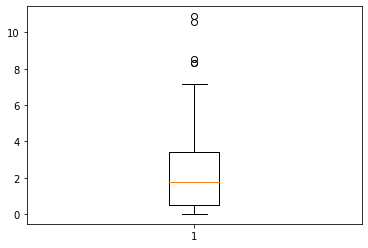

In [6]:
plt.boxplot(df.genome)

Median is located in the orange line.
Box includes from Q1 to Q3.
25% of the data is located before Q1
Points out of the line= Outliers. 
IQR=Q3-Q1 and the lines go from (Q1-1.5IQR) and Q3+1.5IQR)

In our case is not symmetrical (it's skewed to the right) because high values are more extreme. Our mean is higher than the median. 

In [7]:
dec=df[df.group == 'Decapods']
iso=df[df.group == 'Isopods']

{'whiskers': [<matplotlib.lines.Line2D at 0x239c40fac88>,
 'caps': [<matplotlib.lines.Line2D at 0x239c40fddc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x239c40fa148>],
 'medians': [<matplotlib.lines.Line2D at 0x239c4103ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x239c4103fc8>],
 'means': []}

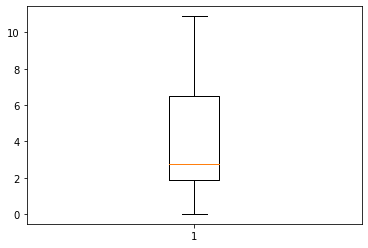

In [8]:
plt.boxplot(dec.genome)

{'whiskers': [<matplotlib.lines.Line2D at 0x239c41699c8>,
 'caps': [<matplotlib.lines.Line2D at 0x239c416d988>,
 'boxes': [<matplotlib.lines.Line2D at 0x239c4163ec8>],
 'medians': [<matplotlib.lines.Line2D at 0x239c4170908>],
 'fliers': [<matplotlib.lines.Line2D at 0x239c4170f48>],
 'means': []}

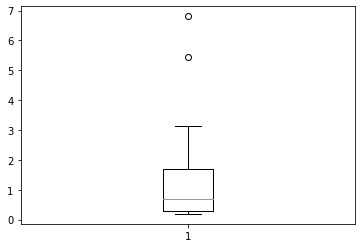

In [9]:
plt.boxplot(iso.genome)

Decapods         AxesSubplot(0.1,0.15;0.363636x0.75)
Isopods     AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

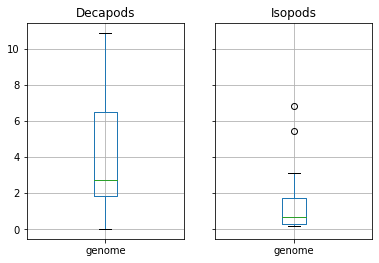

In [10]:
df.groupby("group").boxplot()

In [11]:
df.describe()

,genome
count,54.000000
mean,2.755370
std,2.867481
min,0.010000
25%,0.497500
50%,1.785000
75%,3.445000
max,10.890000


The data is clearly skewed to the right. It does not look like it follows a normal distribution.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000239C43ED688>,
      dtype=object)

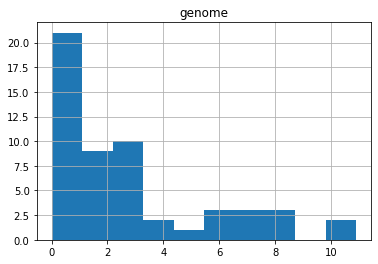

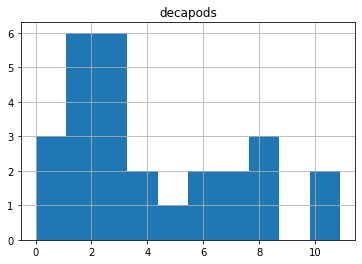

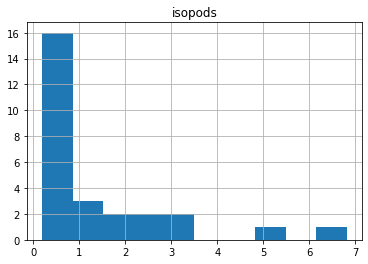

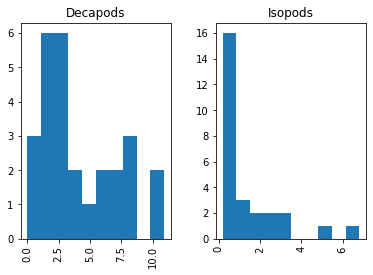

In [12]:
df.hist()
dec.hist()
plt.title("decapods")
iso.hist()
plt.title("isopods")
df.genome.hist(by=df.group) #histogram by groups

A better graphical way to look at data normality is to perform a Q-Q plot. A histogram shows the frequencies
of different values in the variable (counts). Depending on how the histogram looks it can be misleading. It’s
better to use the Q-Q plot. A Q-Q plot shows the mapping between the distribution of the data and the ideal
distribution (the normal distribution in this case). Usually a line is plotted through the quartiles. When the
dots follow the line closely, the data has a normal distribution.

**HINT:** We can use *sm.qqplot()* function to draw a Q-Q plot in Python.

Text(0.5, 1.0, 'isopods')

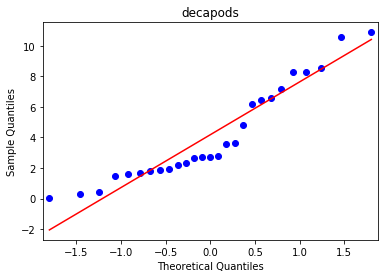

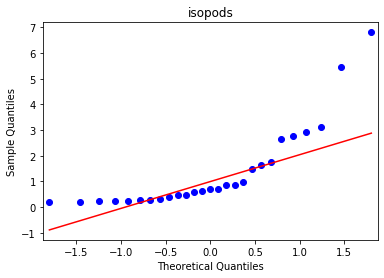

In [13]:
sm.qqplot(dec.genome, line="q")
plt.title("decapods")
sm.qqplot(iso.genome, line="q")
plt.title("isopods")


In python, the QQ-plot compares our data to a normal distribution.
On the x axis we plot the theoretical values that would correspond to a normal distribution of same mean and same std. In the y axis we plot the actual data.
In our case, data is not normal, as it's not found in the diagonal: There is not good correspondence between what is expected and the results.

Spoiler: QQplot might be more useful than certain statistical tests.

2\. Calculate mean and variance of each group. Compare them.

In [14]:
df.groupby("group").describe()

genome                                                    
          count      mean       std   min   25%   50%    75%    max
group                                                              
Decapods   27.0  4.133333  3.175416  0.01  1.85  2.75  6.515  10.89
Isopods    27.0  1.377407  1.653557  0.19  0.29  0.70  1.700   6.81

We could have also calculated the variance directly by grouping data 

In [15]:
np.var(df[df.group == 'Decapods']['genome'], ddof=1) #note that we have one degree of freedom and we need to state it.

10.083269230769229

In [16]:
np.var(df[df.group == 'Isopods']['genome'], ddof=1)

2.7342507122507125

Before trying to analyze the data, let's use this data set to explore together how the sampling process may affect the
estimation results.

# Population and sample

Let’s set a population with our best estimate of the mean and variance we can get from our dataset and proceed to a
simulation of the sampling process.

Calculate the best estimate of the mean and the variance assuming the genome size of Decapods and Isopods is the
same.

Eventhough our variable is not normal, let assume we are working with a normal distribution. Later on we will
transform our variable to approximate normality

# Sampling from a normal distribution

We are going to recreate the data about genome size. Then we will see how sample size and number of samples can
affect the sampling distribution.

Given we want to simulate a sampling from a normal distribution we will apply the log10 transformation to our data.
Use the *log10()* function. Calculate the mean and the variance of the newly transformed data. Are the variances more
similar now?


In [17]:
df["log10"]=np.log10(df.genome)
df.head()

,group,genome,log10
0,Decapods,1.60,0.204120
1,Decapods,1.65,0.217484
2,Decapods,1.80,0.255273
3,Decapods,1.90,0.278754
4,Decapods,1.94,0.287802


In [18]:
df.groupby('group').describe()['log10']

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
Decapods,27.0,0.402046,0.617043,-2.000000,0.267013,0.439333,0.813904,1.037028
Isopods,27.0,-0.106685,0.461436,-0.721246,-0.537860,-0.154902,0.230080,0.833147


STD has decreased a lot after the transformation: log10 pulls extreme values close to the cluster of data, making the data more symmetrical.

t-test assumes groups have the same variance. 

Now plot the histogram and the Q-Q plot of the transformed data. Do they look nearly normal?

Text(0.5, 1.0, 'isopods')

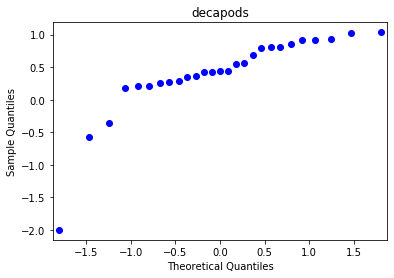

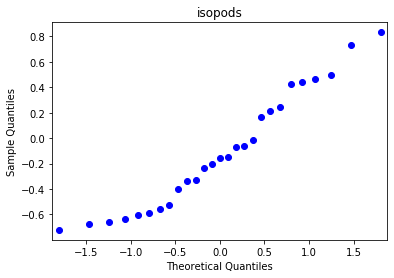

In [19]:
dec=df[df.group == 'Decapods']
iso=df[df.group == 'Isopods']
sm.qqplot(dec.log10)
plt.title("decapods")
sm.qqplot(iso.log10)
plt.title("isopods")

First, we need to create the values of genome size. We’ll use the function **random.normal()** from Numpy to create a random normal distribution with mean = 0.1476808 and sd = 0.5976242.

*IMPORTANT*: If you are creating random variables or sampling variables randomly, you should use the function
**random.seed()** from Numpy to set the seed number. That means that you “set” the sequence of random numbers that Python gives you (they are pseudo-random), so you can reproduce your work later on. If not different sessions will give different simulation results.

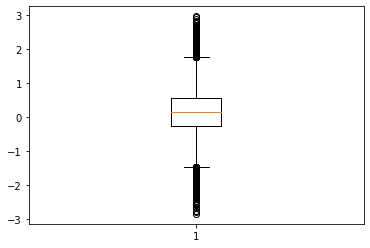

(array([2.50000e+01, 1.08100e+03, 1.71970e+04, 1.13781e+05, 3.10395e+05,
        3.53591e+05, 1.68117e+05, 3.30600e+04, 2.66000e+03, 9.30000e+01]),
 array([-2.84181393, -2.26098531, -1.68015669, -1.09932808, -0.51849946,
         0.06232916,  0.64315778,  1.22398639,  1.80481501,  2.38564363,
         2.96647225]),
 <a list of 10 Patch objects>)

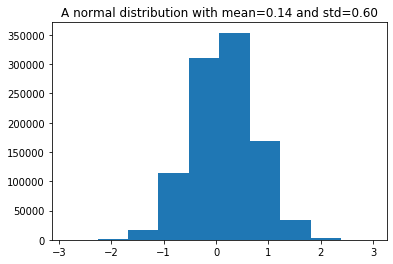

In [20]:
np.random.seed(0) #important if we are interested in having a reproducible analysis. 
genomesize = np.random.normal(loc=0.1476808, scale=0.5976242, size=1000000) #creo un set de dades constants
plt.boxplot(genomesize)
plt.show()
plt.title("A normal distribution with mean=0.14 and std=0.60")
plt.hist(genomesize)

1\. Sample from genome size a thousand samples of sample size = 27 and plot the sampling distribution of the
mean.

To do the sampling we wrote a function called *doSampling()*. Feel free to change it or wrote your own!

**HINT**: If you use *doSampling()* function, you can collect the results of the sampling with *np.fromiter()* function.

In [21]:
def doSampling(dat, numSamples, sizeSamples):
    # calculate and plot a sampling distribution of the mean
    # parameters given are:
        # dat = data to sample from (numeric vector),
        # numSamples = number of times you want to sample (number)
        # sizeSamples = size of the sample (number)
    for i in range(numSamples):
        # simple random sampling
        get_sample = np.random.choice(dat, size = sizeSamples, replace = True) #replace=true fa que pugui agafar valors que ja hagi agafat abans
        #random.choice, de les dades en tria sizesamples (en aquest cas 27)
        #calculate mean and return it
        yield np.mean(get_sample)


With yield we're generating an iterable object. With return we would be generating numbers.

In [22]:
x=doSampling(genomesize, 1000, 27) #agafem 1000 vegades una mostra de 27 elements

In [23]:
samplingdist=np.fromiter(x, float)

fromiter is a way of collecting the data from the function.

Text(0, 0.5, 'value')

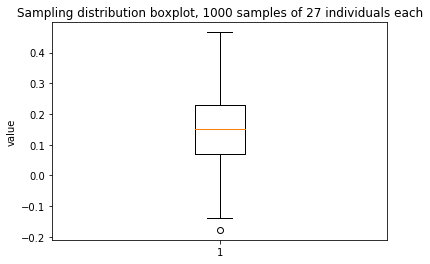

In [24]:
plt.boxplot(samplingdist)
plt.title("Sampling distribution boxplot, 1000 samples of 27 individuals each")
plt.ylabel("value")


Text(0, 0.5, 'value')

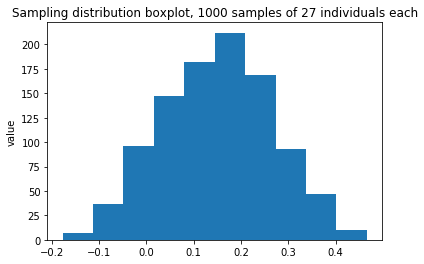

In [25]:
plt.hist(samplingdist)
plt.title("Sampling distribution boxplot, 1000 samples of 27 individuals each")
plt.ylabel("value")

2\. Calculate the mean of the population and the sampling distribution of the mean. Are they similar?

In [26]:
print(samplingdist.mean()) #sampling distribution
print(genomesize.mean()) #population

0.150724813222857
0.14858449535163015


3\. Calculate the standard deviation of both distributions. Check if the CLT really estimates the sample standard
deviation.


A l'hora de fer la std hem de posar-hi ddof=1 que significa que restem 1 al número de degrees of freedom. 

A més, el número que volem comparar és la std de la sampling distribution, que hauria de ser igual a l'std de la sampling distribution dividit per l'arrel del número d'individuals a cada mostra (veure apunts)

In [27]:
print(samplingdist.std(ddof=1)) #sampling distribution
print(genomesize.std(ddof=1)/(np.sqrt(27))) #population

0.1159834320741404
0.11500383989913565


4\. What happens when you change the number of times that you sample? Try sampling 10 times, 100 times, and so on.

The mean of the sampling distribution is  0.20501848996001998
The mean of the population is  0.14858449535163015
The standard deviation of the sampling distribution is  0.09382044264338614
The standard deviation of the population is  0.11500383989913565


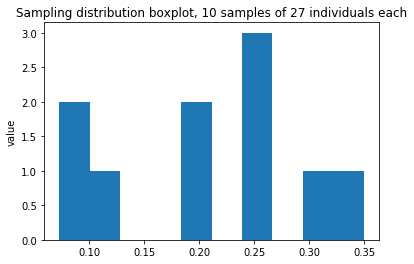

In [28]:
x=doSampling(genomesize, 10, 27) #agafem 10 vegades una mostra de 27 elements
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title("Sampling distribution boxplot, 10 samples of 27 individuals each")
plt.ylabel("value")
print("The mean of the sampling distribution is ", samplingdist.mean()) #sampling distribution
print("The mean of the population is ", genomesize.mean()) #population
print("The standard deviation of the sampling distribution is ", samplingdist.std(ddof=1)) #sampling distribution
print("The standard deviation of the population is ", genomesize.std(ddof=1)/(np.sqrt(27))) #population

The mean of the sampling distribution is  0.16776025841284123
The mean of the population is  0.14858449535163015
The standard deviation of the sampling distribution is  0.10842432875483934
The standard deviation of the population is  0.11500383989913565


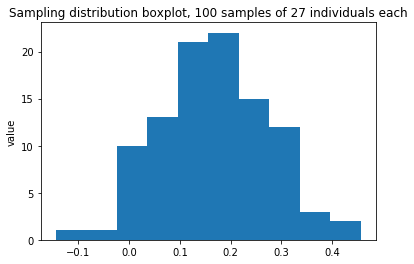

In [29]:
x=doSampling(genomesize, 100, 27) #agafem 100 vegades una mostra de 27 elements
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title("Sampling distribution boxplot, 100 samples of 27 individuals each")
plt.ylabel("value")
print("The mean of the sampling distribution is ", samplingdist.mean()) #sampling distribution
print("The mean of the population is ", genomesize.mean()) #population
print("The standard deviation of the sampling distribution is ", samplingdist.std(ddof=1)) #sampling distribution
print("The standard deviation of the population is ", genomesize.std(ddof=1)/(np.sqrt(27))) #population

The mean of the sampling distribution is  0.1420556012041392
The mean of the population is  0.14858449535163015
The standard deviation of the sampling distribution is  0.11400735039993405
The standard deviation of the population is  0.11500383989913565


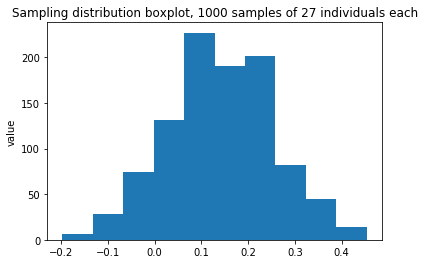

In [30]:
x=doSampling(genomesize, 1000, 27) #agafem 1000 vegades una mostra de 27 elements
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title("Sampling distribution boxplot, 1000 samples of 27 individuals each")
plt.ylabel("value")
print("The mean of the sampling distribution is ", samplingdist.mean()) #sampling distribution
print("The mean of the population is ", genomesize.mean()) #population
print("The standard deviation of the sampling distribution is ", samplingdist.std(ddof=1)) #sampling distribution
print("The standard deviation of the population is ", genomesize.std(ddof=1)/(np.sqrt(27))) #population

The mean of the sampling distribution is  0.1486361102957764
The mean of the population is  0.14858449535163015
The standard deviation of the sampling distribution is  0.1143819582466555
The standard deviation of the population is  0.11500383989913565


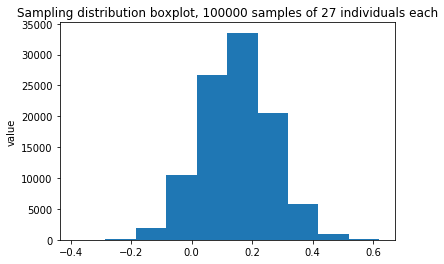

In [31]:
x=doSampling(genomesize, 100000, 27) #agafem 100000 vegades una mostra de 27 elements
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title("Sampling distribution boxplot, 100000 samples of 27 individuals each")
plt.ylabel("value")
print("The mean of the sampling distribution is ", samplingdist.mean()) #sampling distribution
print("The mean of the population is ", genomesize.mean()) #population
print("The standard deviation of the sampling distribution is ", samplingdist.std(ddof=1)) #sampling distribution
print("The standard deviation of the population is ", genomesize.std(ddof=1)/(np.sqrt(27))) #population

Not really! As we increase the number of samples, the distribution approaches a normal distribution, the mean of the sampling distribution is closer to the mean of the population and the standard deviation of the sampling distribution is always the std the sampling distribution of the population / sqrt(n) (on n=27, número de mostres a cada sample)

5\. What happens when we increase the size of the sample that we take? Try sampling 3 values, 10, 50, 100, and so on.

The mean of the sampling distribution is  0.13097437100062095
The mean of the population is  0.14858449535163015
The standard deviation of the sampling distribution is  0.3359403621603992
The standard deviation of the population is  0.345011519697407


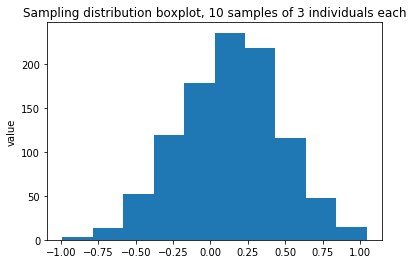

In [32]:
x=doSampling(genomesize, 1000, 3) #agafem 10 vegades una mostra de 3 elements
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title("Sampling distribution boxplot, 10 samples of 3 individuals each")
plt.ylabel("value")
print("The mean of the sampling distribution is ", samplingdist.mean()) #sampling distribution
print("The mean of the population is ", genomesize.mean()) #population
print("The standard deviation of the sampling distribution is ", samplingdist.std(ddof=1)) #sampling distribution
print("The standard deviation of the population is ", genomesize.std(ddof=1)/(np.sqrt(3))) #population

The mean of the sampling distribution is  0.1472946824278559
The mean of the population is  0.14858449535163015
The standard deviation of the sampling distribution is  0.190577079026131
The standard deviation of the population is  0.18897059193740773


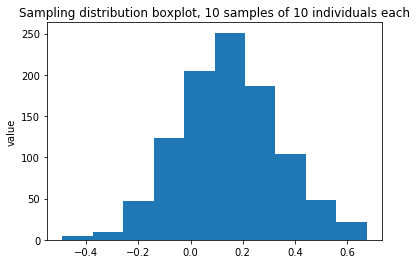

In [33]:
x=doSampling(genomesize, 1000, 10) #agafem 10 vegades una mostra de 10 elements
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title("Sampling distribution boxplot, 10 samples of 10 individuals each")
plt.ylabel("value")
print("The mean of the sampling distribution is ", samplingdist.mean()) #sampling distribution
print("The mean of the population is ", genomesize.mean()) #population
print("The standard deviation of the sampling distribution is ", samplingdist.std(ddof=1)) #sampling distribution
print("The standard deviation of the population is ", genomesize.std(ddof=1)/(np.sqrt(10))) #population

The mean of the sampling distribution is  0.15014227631719018
The mean of the population is  0.14858449535163015
The standard deviation of the sampling distribution is  0.06232596052187671
The standard deviation of the population is  0.05975774813124594


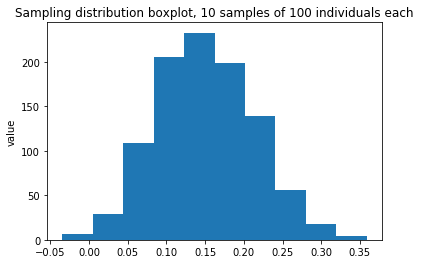

In [34]:
x=doSampling(genomesize, 1000, 100) #agafem 10 vegades una mostra de 100 elements
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title("Sampling distribution boxplot, 10 samples of 100 individuals each")
plt.ylabel("value")
print("The mean of the sampling distribution is ", samplingdist.mean()) #sampling distribution
print("The mean of the population is ", genomesize.mean()) #population
print("The standard deviation of the sampling distribution is ", samplingdist.std(ddof=1)) #sampling distribution
print("The standard deviation of the population is ", genomesize.std(ddof=1)/(np.sqrt(100))) #population

In that case, as we increase the sample size the std gets smaller.

<b>When we increase the sample size the standard deviation of the sampling distribution decreases and we approach more the law of large numbers.
    However, when we change only the number of samples, the parameters won't change: the std will remain the same. So, we only need to do enough samples but once we've done enough it won't change anymore.
    
    Comparing plots with different number of points is not useful!

# Student t-test

Going back to our dataset. The dependent variable is continous, the independent variable is categorical and we have 2
groups. The appropiate statistical test is a t-test. However, given the dependent variable is not normally distributed,
and the variances are not similar between the groups, we cannot use the Student t test directly. To do it we have
transformed the data to fit it into a normal distribution. We applied the log10 transformation to our data.

**HINT**: A function for performing t-test in Python is *stats.ttest_ind()*

Null hypothesis: decapods and ispods have the same genome size
Alternative hypothesis: Genome size is different

In [35]:
stats.ttest_ind?

In [36]:
stats.ttest_ind(dec.log10, iso.log10) #statistic is tstudent

Ttest_indResult(statistic=3.430827411085974, pvalue=0.0011868462908959305)

What does that mean?
3.43 = Signal to noise ratio: 
p= if it was only noise, we could get a number similar to this one with a probability of a 0.11%

In [37]:
tvalue=stats.ttest_ind(dec.log10, iso.log10)[0]
print(tvalue)

3.430827411085974


Decapods amd isopods genome size is different with a confidence (alpha) of 99% assuming the sample is normally distributed and the sample is a good estimate of the population. COMMENT RESULT WHEN COMMENTING THE PRACTICAL

True, but often we do not really care about the alpha value but only getting a very small p, which means that we can reject our hypothesis with high confidence.

# t-test simulation
1\. The p-value obtained in the t-test analysis is based on the theoretical t-distribution. However, we can also
calculate the p-value by simulating the null hypothesis of the groups having the same mean genome size. Then,
the p-value would be the probability of obtaining a t-value equal or higher than the one observed in our
empirical data.


Let’s create a random normal distribution with the mean and variance of the whole dataset.

In [38]:
print(df.log10.mean())
print(df.log10.std())

0.14768079007846735
0.5976242406316196


In [39]:
np.random.seed(1) #utilitzant les dades amb
genomesize_datalog = np.random.normal(0.1476807, 0.5976242, 1000000) #creo un set de dades constants amb la mitjana i variança de les dades

In [40]:
np.random.seed(1) #utilitzant les dades sense logaritmes
genomesize_data = np.random.normal(2.755370, 2.867481, 1000000) #creo un set de dades constants amb la mitjana i variança de les dades

2\. Now we will start our sampling experiment, which will consist of drawing 10.000 times two samples of size 27
each and calculate the t-value. The distribution of the t-values obtained is an empirical t-distribution. There are
several ways of doing this calculation, for instance with a for loop.

In [41]:
def doSamplingT(dat, numSamples, sizeSamples):
    # calculate and plot a sampling distribution of the mean
    # parameters given are:
        # dat = data to sample from (numeric vector),
        # numSamples = number of times you want to sample (number)
        # sizeSamples = size of the sample (number)
    for i in range(numSamples):
        # simple random sampling
        get_sample1 = np.random.choice(dat, size = sizeSamples, replace = True)
        get_sample2 = np.random.choice(dat, size = sizeSamples, replace = True)#replace=true fa que pugui agafar valors que ja hagi agafat abans
        #random.choice, de les dades en tria sizesamples 
        #calculate mean and return it
        yield stats.ttest_ind(get_sample1,get_sample2)[0] #aquest 0 fa que només s'agafi l'statistic (tvalue)


0.011416122277584689
1.0177842170662617


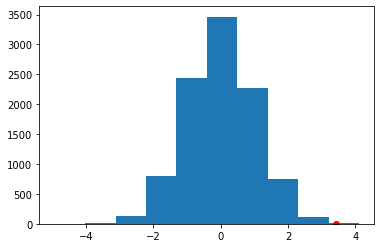

In [77]:
y=doSamplingT(genomesize_datalog, 10000, 27) 
ttest=np.fromiter(y, float)
plt.hist(ttest)
plt.plot(tvalue,0,'ro') #plots the tvalue in the plot.
print(ttest.mean())
print(ttest.std())

3\. Now calculate the p-value using the distribution of t-values obtained

en quina probabilitat existeix aquesta t en l'altra distribució?

In [78]:
signif = ttest[ttest >= tvalue]
(len(signif) / 10000) *2



0.0018

This is the calculated p value. It's still lower than 0,025, so the data between decapods and isopods is different with a 95% of confidence.

If we want smaller p-values we should increase the number of iterations. It's a result of the number of samples we're taking. We're not gonna take a smaller p value than 1/numsamples.

# Randomization test

You have to reproduce the same simulation but instead of using a sampling from a normal distribution with the same
mean and variance, you will apply a randomization test. The randomization test gives us a way to measure the
variability in the difference of two sample means. Our goal is to compare the observed difference between Decapods
and Isopods to the expected difference due to chance.

To perform a randomization test you have to take your initial dataset of 54 individuals and randomly divide the
sample into two groups. There is a huge number of different possible ways to divide the 54 observations into two
groups, each of size 27 (could you calculate the number?). We will do this resampling process only 10.000 times. For
each time you resample, you will have to perform the t-test on the two samples and save the t-value in a vector (as you
already did). The result will be a distribution of t-values to estimate the significance of your result.

Do the experiment on both the raw data and the transformed one. Compare the results that you obtained in the
previous section and give your opinion of the whole experiment.

In [44]:
def doSamplingT1(dat, numSamples, sizeSamples):
    for i in range(numSamples):
        g1 = np.random.choice(df.genome, size = 27)
        g2 = [j for j in df.genome if j not in g1]
        tval = stats.ttest_ind(g1,g2)[0]
        yield(tval)



In [45]:
z=doSamplingT1(df.genome, 10000, 27)
ttest=np.fromiter(z,float)

In [46]:
signif = ttest[ttest >= tvalue]
(len(signif) / 10000) *2

0.004

This is the ttest results for the raw data, without log10. The obtained p value is greater than 0,025, so we couldn't conclude decapods and isopods have different genome sizes.

In [47]:
def doSamplingTlog(dat, numSamples, sizeSamples):
    for i in range(numSamples):
        g1 = np.random.choice(df.log10, size = 27)
        g2 = [j for j in df.log10 if j not in g1]
        tval = stats.ttest_ind(g1,g2)[0]
        yield(tval)
z=doSamplingTlog(df.log10,10000,27)
ttest=np.fromiter(z,float)
signif = ttest[ttest >= tvalue]
(len(signif) / 10000) *2

0.003

Now the p value is smaller than 0,025, so, after applying log10 to the values of the sample we can conclude that the two groups of individuals (decapods and isopods) have different genome sizes.

In the randomization tests there are no assumptions: we don't need to know if the distribution is normal or not before doing. We're just counting how many values are higher than ours. 

This will be useful when we want to take some parameters from our sample but it does not follow a specific distribution.

# Exercise 1: Paired t-test. To be submited

To investigate the effects of lighting conditions on the orb-spinning spider webs, researchers measured the
horizontal (width) and vertical (height) dimensions of the webs made by 17 spiders under light and dim
conditions. Accepting that the webs of individual spiders vary considerably, they employed a paired design in
which each individual spider acts as its own control. A paired t-test performs a one sample t-test on the
differences between dimensions under light and dim conditions.

You can find the data in the spider_web.csv file. Note the format of this data set. Rather than organizing the
data into the usual long format in which variables are represented in columns and rows represent individual
replicates, these data have been organized in wide format. Wide format is often used for data containing
repeated measures from individual or other sampling units. Even though this is not necessary (as paired
t-tests can be performed on long format data), traditionally it did allow more compact data management as
well as making it easier to calculate the differences between repeated measurements on each individual.

Perform two separate paired t-tests to test the following null hypotheses:

* No effect of lighting on web width
* No effect of lighting on web height

In [4]:
sw=pd.read_csv('spider_web.txt', sep=" ")
sw.head()

,PAIR,VERTDIM,HORIZDIM,VERTLIGH,HORIZLIG
0,K,300,295,80,60
1,M,240,260,120,140
2,N,250,280,170,160
3,O,220,250,90,120
4,P,160,160,150,180


In [9]:
x=sw[:5]
x

,PAIR,VERTDIM,HORIZDIM,VERTLIGH,HORIZLIG,HDiff,VDiff
0,K,300,295,80,60,235,220
1,M,240,260,120,140,120,120
2,N,250,280,170,160,120,80
3,O,220,250,90,120,130,130
4,P,160,160,150,180,-20,10


In [10]:
stats.ttest_ind(x.HORIZDIM, x.HORIZLIG)

Ttest_indResult(statistic=3.7374279052496484, pvalue=0.005726431770229171)

In [5]:
x=stats.ttest_ind(sw.VERTDIM,sw.VERTLIGH)
if x[1] < 0.05:
    print("There is a significant difference on spider web height under light")
else: print(x)

Ttest_indResult(statistic=0.8887858861631696, pvalue=0.38075080527784877)


In [6]:
x=stats.ttest_ind(sw.HORIZDIM,sw.HORIZLIG)
if x[1] < 0.05:
    print("There is a significant difference on spider web height under light")
else: print(x)

There is a significant difference on spider web height under light


In [16]:
stats.ttest_ind(sw.HORIZDIM,sw.HORIZLIG)

Ttest_indResult(statistic=2.1405166251313874, pvalue=0.04003367486004684)

What's below is not needed, because we don't need to compare if Hdiff is different than Vdiff, but only if there's a difference between lighting or not lighting.

In [7]:
sw["HDiff"]=sw.HORIZDIM-sw.HORIZLIG
sw["VDiff"]=sw.VERTDIM-sw.VERTLIGH
sw[:10]
#We want to perform a paried T-test, so we calculate the difference on horizontal and vertical lenght with dim light or bright light. 

,PAIR,VERTDIM,HORIZDIM,VERTLIGH,HORIZLIG,HDiff,VDiff
0,K,300,295,80,60,235,220
1,M,240,260,120,140,120,120
2,N,250,280,170,160,120,80
3,O,220,250,90,120,130,130
4,P,160,160,150,180,-20,10
5,R,170,150,110,90,60,60
6,S,300,290,260,120,170,40
7,A,180,120,240,220,-100,-60
8,B,200,210,190,210,0,10
9,D+,80,120,120,150,-30,-40


In [52]:
thorizontal=sw.HDiff.mean()/(sw.HDiff.std()/np.sqrt(17))
print(thorizontal)

2.148217249443686


In [53]:
tvertical=sw.VDiff.mean()/(sw.VDiff.std()/np.sqrt(17))
print(tvertical)

0.9654483652369754


In [54]:
stats.ttest_ind(sw.HDiff,sw.VDiff)

Ttest_indResult(statistic=0.8450884627911325, pvalue=0.40433597830398493)

The p value is not smaller than 0.025, therefore, we can't conclude that the horizontal and vertical lenght of a spider net vary in a different way when applying light to spider nets.

# Exercise 2: Sampling from a binomial distribution

Now, we will answer the same questions but sampling from a binomial distribution. The binomial distribution arises
whenever we perform a series of independent trials each of which can result in either success or failure.

1\. Sample from binomial distribution a thousand samples of sample size = 100 and plot the sampling distribution
of the mean.

2\. Calculate the mean of the population and the sampling distribution of the mean. Are they the similar?

3\. Calculate the standard deviation of both distributions. Check if the CLT really estimates the sample standard
deviation.

4\. What happens when you change the number of times that you sample? Try sampling 10 times, 100 times, and so
on

5\. What happens when we increase the size of the sample that we take? Try sampling 3 values, 10, 50, 100, and so
on.


Text(0.5, 1.0, 'Binomial distribution, n=20 p=0,4')

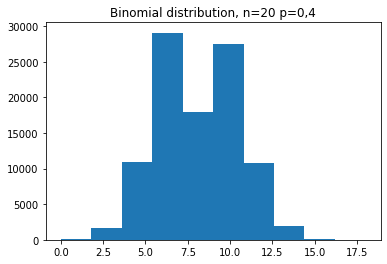

In [55]:
#we first generate a binomial distribution
binomial=np.random.binomial(20,0.4,100000)
plt.hist(binomial)
plt.title("Binomial distribution, n=20 p=0,4")

The mean of the distribution is  7.9966
The mean of the sampling distribution of the mean is  8.00155
The std of the distribution is  2.192593997985035
The std of the sampling distribution of the mean is  0.22138901847201004
The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)
The means difference is smaller than 0.01


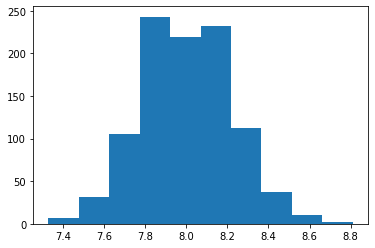

In [56]:
nsamples=1000
sizesamples=100
x=doSampling(binomial, nsamples, sizesamples) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
print("The mean of the distribution is ", binomial.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", binomial.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if binomial.std()/np.sqrt(100) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(binomial.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(binomial.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")

The mean of the distribution is  7.9966
The mean of the sampling distribution of the mean is  8.078
The std of the distribution is  2.192593997985035
The std of the sampling distribution of the mean is  0.22301569451498235
The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)


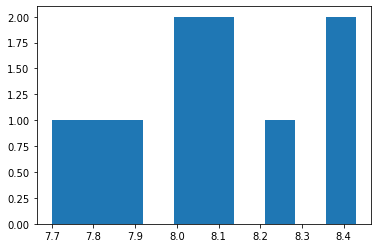

In [57]:
nsamples=10
sizesamples=100
x=doSampling(binomial, nsamples, sizesamples) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
print("The mean of the distribution is ", binomial.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", binomial.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if binomial.std()/np.sqrt(100) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(binomial.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(binomial.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")

with this very few amount of samples, the mean is very different and the sampling distribution is not normal

The mean of the distribution is  7.9966
The mean of the sampling distribution of the mean is  7.978300000000001
The std of the distribution is  2.192593997985035
The std of the sampling distribution of the mean is  0.23512998532726526
The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)


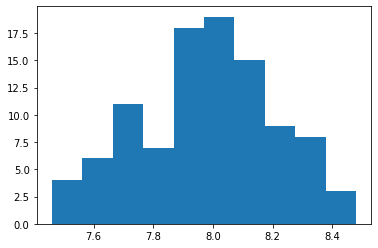

In [58]:
nsamples=100
sizesamples=100
x=doSampling(binomial, nsamples, sizesamples) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
print("The mean of the distribution is ", binomial.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", binomial.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if binomial.std()/np.sqrt(100) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(binomial.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(binomial.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")

The mean of the distribution is  7.9966
The mean of the sampling distribution of the mean is  7.9977350000000005
The std of the distribution is  2.192593997985035
The std of the sampling distribution of the mean is  0.22068842238549805
The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)
The means difference is smaller than 0.01


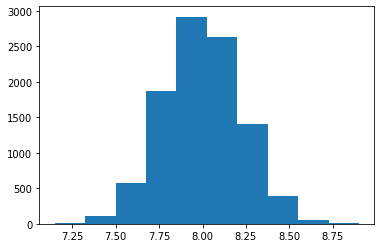

In [59]:
nsamples=10000
sizesamples=100
x=doSampling(binomial, nsamples, sizesamples) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
print("The mean of the distribution is ", binomial.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", binomial.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if binomial.std()/np.sqrt(100) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(binomial.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(binomial.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")

As we increase the number of samples we get a normal distribution.

The mean of the distribution is  7.9966
The mean of the sampling distribution of the mean is  8.016
The std of the distribution is  2.192593997985035
The std of the sampling distribution of the mean is  1.2699823270861335
The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)


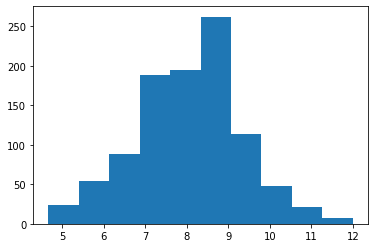

In [60]:
nsamples=1000
sizesamples=3
x=doSampling(binomial, nsamples, sizesamples) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
print("The mean of the distribution is ", binomial.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", binomial.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if binomial.std()/np.sqrt(sizesamples) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(binomial.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(binomial.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")

The mean of the distribution is  7.9966
The mean of the sampling distribution of the mean is  7.9933000000000005
The std of the distribution is  2.192593997985035
The std of the sampling distribution of the mean is  0.6840358981807898
The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)
The means difference is smaller than 0.01


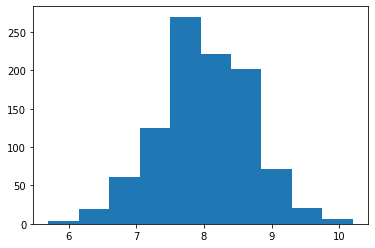

In [61]:
nsamples=1000
sizesamples=10
x=doSampling(binomial, nsamples, sizesamples) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
print("The mean of the distribution is ", binomial.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", binomial.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if binomial.std()/np.sqrt(sizesamples) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(binomial.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(binomial.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")

The mean of the distribution is  7.9966
The mean of the sampling distribution of the mean is  7.995001
The std of the distribution is  2.192593997985035
The std of the sampling distribution of the mean is  0.06842478351445477
The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)
The means difference is smaller than 0.01


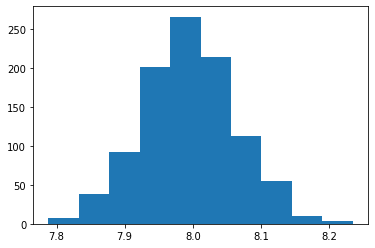

In [62]:
nsamples=1000
sizesamples=1000
x=doSampling(binomial, nsamples, sizesamples) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
print("The mean of the distribution is ", binomial.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", binomial.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if binomial.std()/np.sqrt(sizesamples) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(binomial.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(binomial.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")

As we get more data the distribution approaches to a normal distribution. In the case of increasing the sample size, the standard deviation of the sampling distribution decreases.


# Exercise 3: Sampling from an uniform distribution

Finally, we will do the same using an uniform distribution. For instance, let’s generate an uniform distribution of
numbers 0 to 9.

1\. Sample from uniform distribution a thousand samples of sample size = 100 and plot the sampling distribution of
the mean.

2\. Calculate the mean of the population and the sampling distribution of the mean. Are they the similar?

3\. Calculate the standard deviation of both distributions. Check if the CLT really estimates the sample standard
deviation.

4\. What happens when you change the number of times that you sample? Try sampling 10 times, 100 times, and so on.

5\. What happens when we increase the size of the sample that we take? Try sampling 3 values, 10, 50, 100, and so
on.


Text(0.5, 1.0, 'uniform distribution')

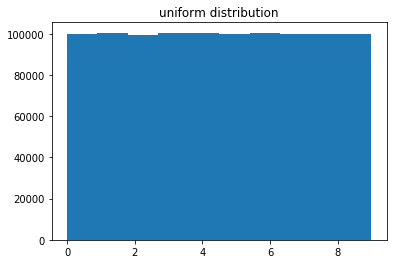

In [63]:
np.random.seed(3)
uniform=np.random.randint(0,10, size=1000000)
plt.hist(uniform)
plt.title("uniform distribution")


The mean of the distribution is  4.499665
The mean of the sampling distribution of the mean is  4.49607
The std of the distribution is  2.871053445649349
The std of the sampling distribution of the mean is  0.2862475416488323
The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)
The means difference is smaller than 0.01


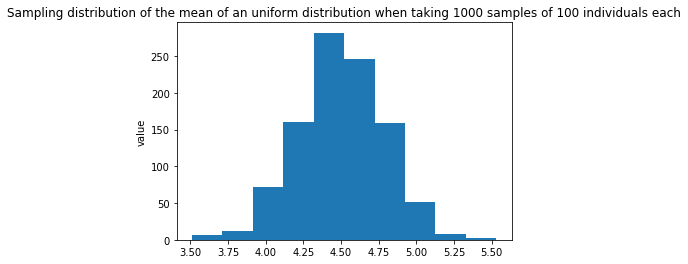

In [64]:
x=doSampling(uniform, 1000, 100) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title('Sampling distribution of the mean of an uniform distribution when taking 1000 samples of 100 individuals each')
plt.ylabel("value")
print("The mean of the distribution is ", uniform.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", uniform.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if uniform.std()/np.sqrt(100) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(uniform.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(uniform.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")


The mean of the uniform distribution and the sampling distribution of the mean is the same.

Now, we sample different times

The mean of the distribution is  4.499665
The mean of the sampling distribution of the mean is  4.5520000000000005
The std of the distribution is  2.871053445649349
The std of the sampling distribution of the mean is  0.34818960352084044
The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)
The means are not too close


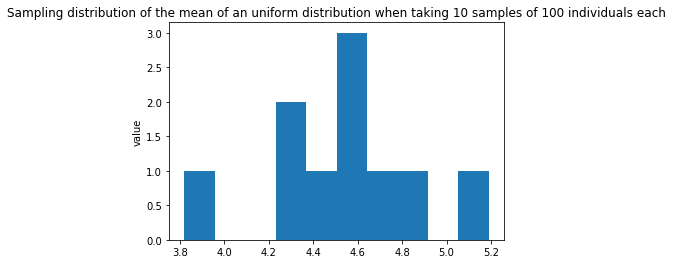

In [65]:
#we sample 10 times

x=doSampling(uniform, 10, 100) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title('Sampling distribution of the mean of an uniform distribution when taking 10 samples of 100 individuals each')
plt.ylabel("value")
print("The mean of the distribution is ", uniform.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", uniform.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if uniform.std()/np.sqrt(100) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(uniform.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(uniform.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")
else:
    print("The means are not too close")

The mean of the distribution is  4.499665
The mean of the sampling distribution of the mean is  4.4595
The std of the distribution is  2.871053445649349
The std of the sampling distribution of the mean is  0.2763670566474955
The sampling distribution std does not correspond to what we expect
The means are not too close


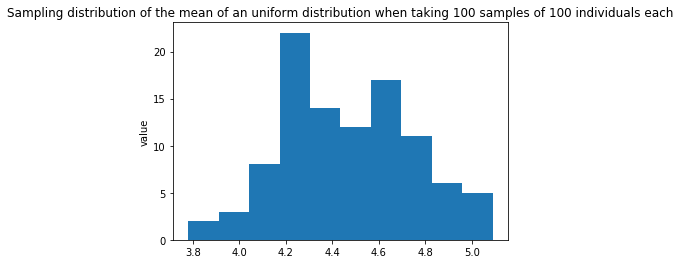

In [66]:
#we sample 100 times

x=doSampling(uniform, 100, 100) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title('Sampling distribution of the mean of an uniform distribution when taking 100 samples of 100 individuals each')
plt.ylabel("value")
print("The mean of the distribution is ", uniform.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", uniform.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if uniform.std()/np.sqrt(100) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(uniform.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(uniform.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")
else:
    print("The means are not too close")

In [67]:
samplingdist.mean()

4.4595

The mean of the distribution is  4.499665
The mean of the sampling distribution of the mean is  4.51429
The std of the distribution is  2.871053445649349
The std of the sampling distribution of the mean is  0.29110117811510144
The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)
The means are not too close


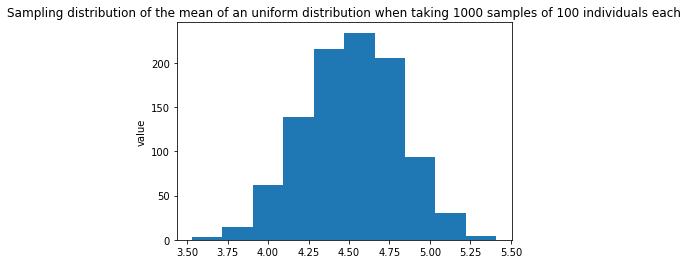

In [68]:
#we sample 1000 times

x=doSampling(uniform, 1000, 100) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title('Sampling distribution of the mean of an uniform distribution when taking 1000 samples of 100 individuals each')
plt.ylabel("value")
print("The mean of the distribution is ", uniform.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", uniform.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if uniform.std()/np.sqrt(100) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(uniform.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(uniform.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")
else:
    print("The means are not too close")

The mean of the distribution is  4.499665
The mean of the sampling distribution of the mean is  4.497258
The std of the distribution is  2.871053445649349
The std of the sampling distribution of the mean is  0.2851487005686682
The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)
The means difference is smaller than 0.01


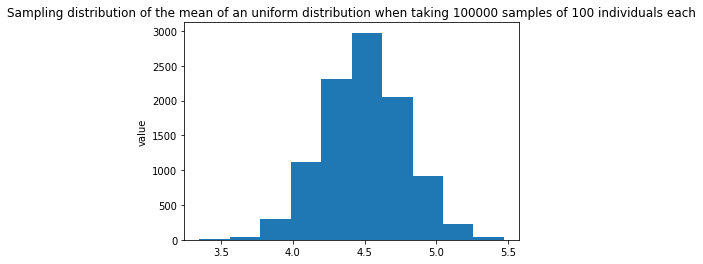

In [69]:
#we sample 100000 times

x=doSampling(uniform, 10000, 100) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title('Sampling distribution of the mean of an uniform distribution when taking 100000 samples of 100 individuals each')
plt.ylabel("value")
print("The mean of the distribution is ", uniform.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", uniform.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if uniform.std()/np.sqrt(100) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(uniform.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(uniform.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")
else:
    print("The means are not too close")

We see that the std of the sampling distribution stays the same, while the mean approaches the population mean as we increase the number of samples.

Now, we increase the number of individuals taken in each sample. The std will decrease.

The mean of the distribution is  4.499665
The mean of the sampling distribution of the mean is  4.515700000000001
The std of the distribution is  2.871053445649349
The std of the sampling distribution of the mean is  0.882203780313823
The sampling distribution std does not correspond to what we expect
The means are not too close


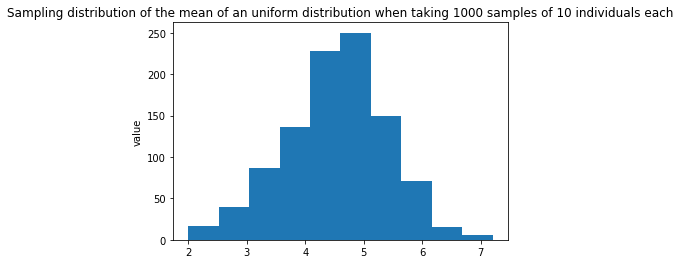

In [70]:
#Changing the number of individuals of each of the 1000 samples

x=doSampling(uniform, 1000, 10) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title('Sampling distribution of the mean of an uniform distribution when taking 1000 samples of 10 individuals each')
plt.ylabel("value")
print("The mean of the distribution is ", uniform.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", uniform.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if uniform.std()/np.sqrt(10) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(uniform.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(uniform.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")
else:
    print("The means are not too close")

The mean of the distribution is  4.499665
The mean of the sampling distribution of the mean is  4.5008099999999995
The std of the distribution is  2.871053445649349
The std of the sampling distribution of the mean is  0.2913236068361093
The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)
The means difference is smaller than 0.01


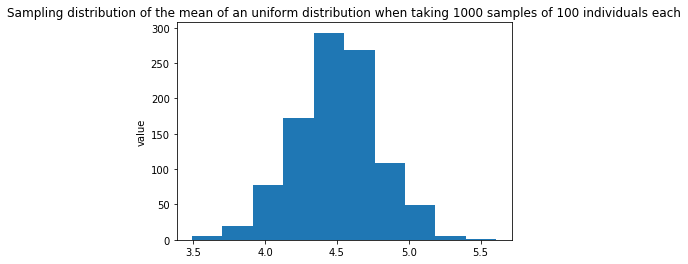

In [71]:
#Changing the number of individuals of each of the 1000 samples

x=doSampling(uniform, 1000, 100) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title('Sampling distribution of the mean of an uniform distribution when taking 1000 samples of 100 individuals each')
plt.ylabel("value")
print("The mean of the distribution is ", uniform.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", uniform.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if uniform.std()/np.sqrt(100) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(uniform.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(uniform.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")
else:
    print("The means are not too close")

The mean of the distribution is  4.499665
The mean of the sampling distribution of the mean is  4.498808
The std of the distribution is  2.871053445649349
The std of the sampling distribution of the mean is  0.08792467876540692
The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)
The means difference is smaller than 0.001


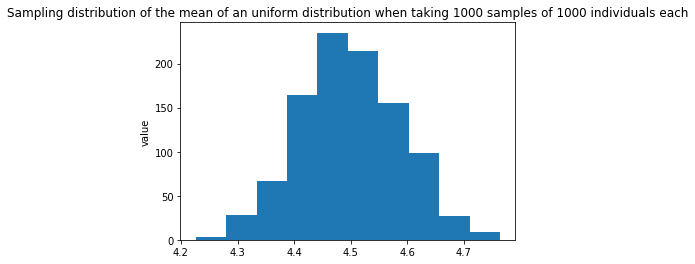

In [72]:
#Changing the number of individuals of each of the 1000 samples

x=doSampling(uniform, 1000, 1000) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title('Sampling distribution of the mean of an uniform distribution when taking 1000 samples of 1000 individuals each')
plt.ylabel("value")
print("The mean of the distribution is ", uniform.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", uniform.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if uniform.std()/np.sqrt(1000) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(uniform.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(uniform.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")
else:
    print("The means are not too close")

The mean of the distribution is  4.499665
The mean of the sampling distribution of the mean is  4.4992936100000005
The std of the distribution is  2.871053445649349
The std of the sampling distribution of the mean is  0.008788590869297544
The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)
The means difference is smaller than 0.001


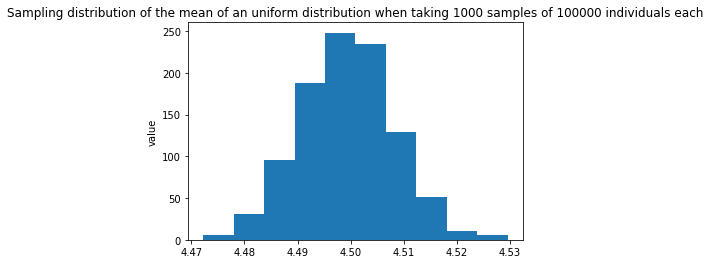

In [73]:
#Changing the number of individuals of each of the 1000 samples

x=doSampling(uniform, 1000, 100000) 
samplingdist=np.fromiter(x, float)
plt.hist(samplingdist)
plt.title('Sampling distribution of the mean of an uniform distribution when taking 1000 samples of 100000 individuals each')
plt.ylabel("value")
print("The mean of the distribution is ", uniform.mean() )
print("The mean of the sampling distribution of the mean is ", samplingdist.mean() )
print("The std of the distribution is ", uniform.std() )
print("The std of the sampling distribution of the mean is ", samplingdist.std() )
if uniform.std()/np.sqrt(100000) - samplingdist.std() <0.01:
    print("The std of the sampling distribution corresponds to what we would expect, and it is the std of the uniform distribution / sqrt(number of samples)")
else:
    print("The sampling distribution std does not correspond to what we expect")

if abs(uniform.mean()-samplingdist.mean()) < 0.001:
     print("The means difference is smaller than 0.001")
elif abs(uniform.mean()-samplingdist.mean()) < 0.01:
    print("The means difference is smaller than 0.01")
else:
    print("The means are not too close")


# Functions' guide

Here you can find a brief help section for the most relevant functions and arguments used through the session. For detailled information about specific functions and extra functionalities remember that you can check the manual of a function by typing *help(your_function)* or just using Google. 

* **pd.read_table(data, header=None)**

    Read general delimited file into DataFrame.

    header=None implies that we don't have a header in our data and we don't want Python to interpret the first line f the data as the header, which is the default.
    

* **sm.qqplot(data, line = 'q')**

    Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.

    “q” - A line is fit through the quartiles.
    

* **np.random.normal(size = size_of_your_sample, loc = mean, scale =sd)**

    Draw random samples from a normal (Gaussian) distribution.

    size - Number of samples you want to draw from a normal distribution.
    loc - Mean (“centre”) of the distribution.
    scale - Standard deviation (spread or “width”) of the distribution. Must be non-negative.
    

* **np.random.choice(data, size = size_of_your_sample, replace = True)**

    Generates a random sample from a given data.

    size = Number of samples you want to draw from your data
    replace = True: Sample with replacement, meaning that you can draw the same value several times.